In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [2]:
# CSV 파일 로드
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [3]:
train['datetime'] = train['datetime'].astype('str')
train['datetime'] = pd.to_datetime(train['datetime'])

In [4]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

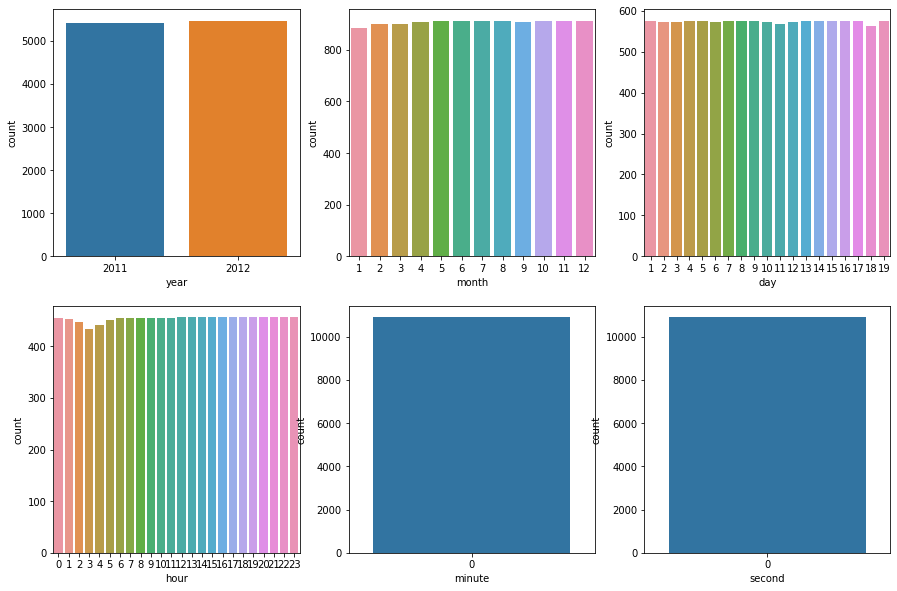

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1) # 2행 3열의 첫 번째 위치
sns.countplot(x='year', data=train)

# month 데이터 시각화
plt.subplot(2, 3, 2) # 2행 3열의 두 번째 위치
sns.countplot(x='month', data=train)

# day 데이터 시각화
plt.subplot(2, 3, 3) # 2행 3열의 세 번째 위치
sns.countplot(x='day', data=train)

# hour 데이터 시각화
plt.subplot(2, 3, 4) # 2행 3열의 네 번째 위치
sns.countplot(x='hour', data=train)

# minute 데이터 시각화
plt.subplot(2, 3, 5) # 2행 3열의 다섯 번째 위치
sns.countplot(x='minute', data=train)

# second 데이터 시각화
plt.subplot(2, 3, 6) # 2행 3열의 여섯 번째 위치
sns.countplot(x='second', data=train)

In [7]:
X = train[['year','month','day','hour','minute','second','temp','humidity']].values
y = train['count'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
predictions = model.predict(X_test)
predictions

array([244.81960313,  59.3905298 , 204.86715478, ..., 305.95473856,
        38.37647599, 248.51416615])

In [12]:
mse = mean_squared_error(y_test, predictions)
mse

19980.737029904267

In [13]:
rmse = mse**0.5

In [14]:
print(rmse)

141.35323494672582


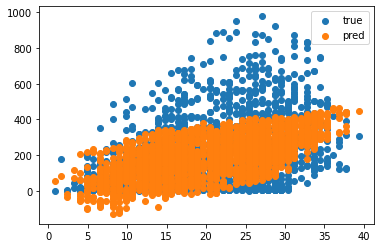

In [16]:
#temp
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.legend()
plt.show()

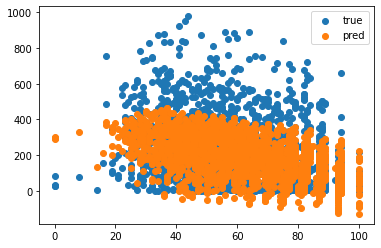

In [17]:
#humidity
plt.scatter(X_test[:, 7], y_test, label="true")
plt.scatter(X_test[:, 7], predictions, label="pred")
plt.legend()
plt.show()